# Credit Card Fraud Detection

## Objective
Identify **fraudulent credit card transactions** using machine learning.

## Dataset Overview
The dataset contains anonymized credit card transactions labeled as fraud or not.

- `Time`, `Amount`, and anonymized features `V1` to `V28`
- `Class`: 1 for fraud, 0 for non-fraud

## Workflow
1. Load and explore the dataset
2. Handle class imbalance
3. Feature scaling and model training
4. Evaluate performance

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load the dataset
df = pd.read_csv("creditcard.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

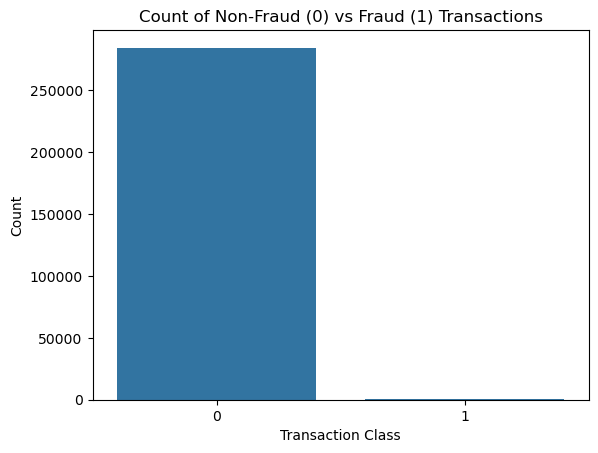

Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraud Transactions: 0.1727%


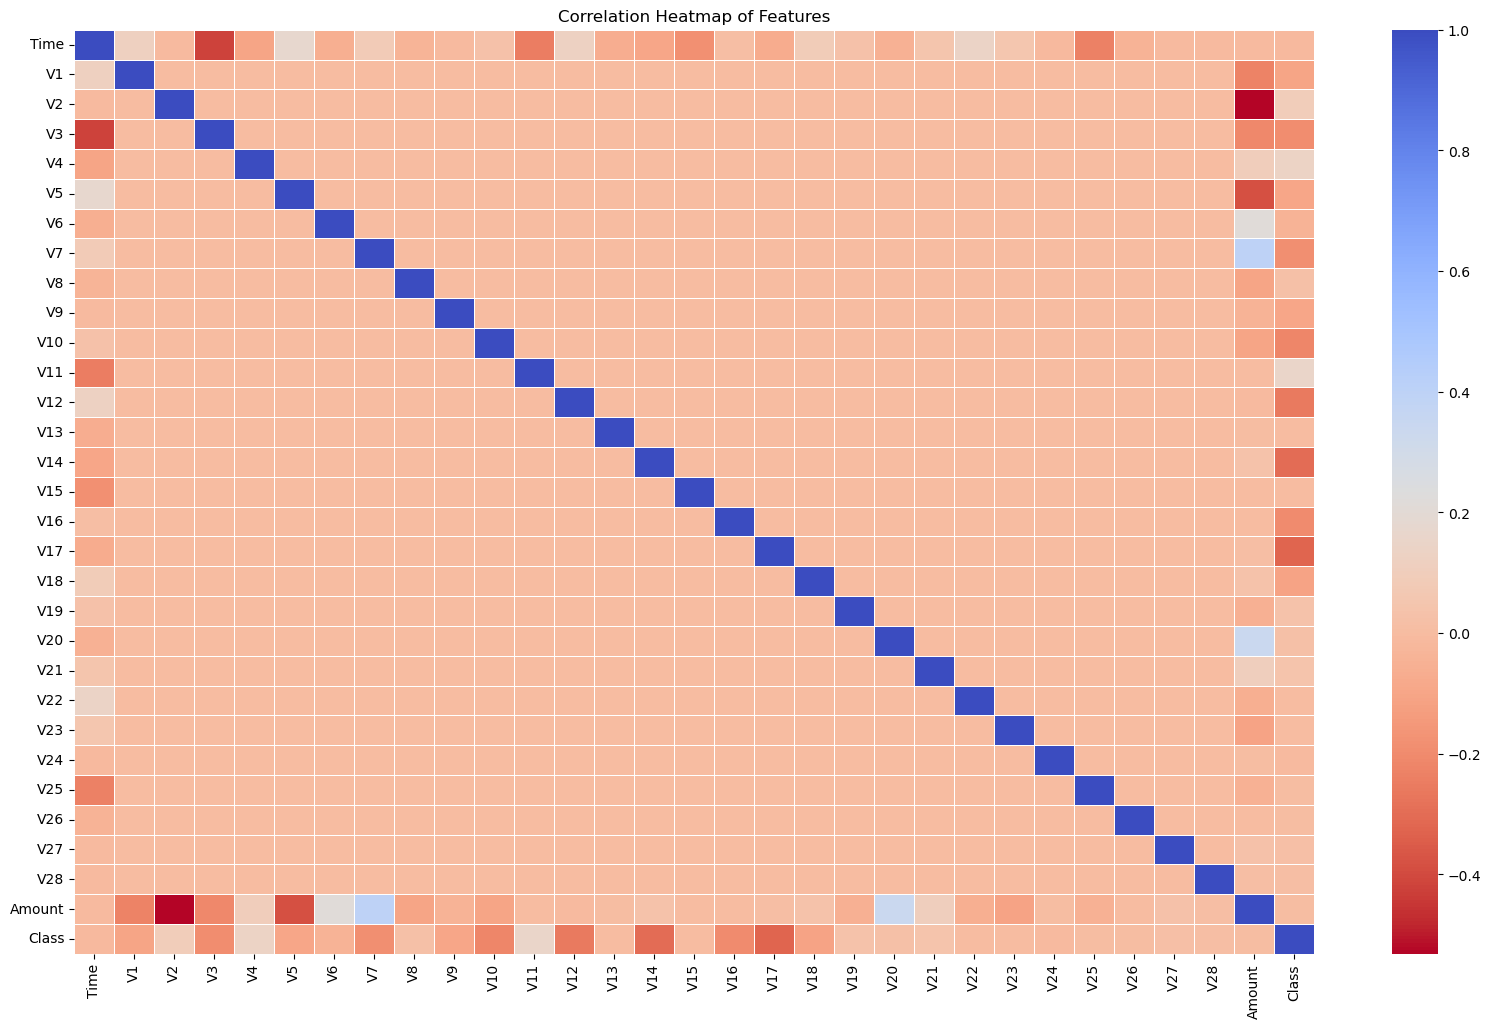

In [6]:
# Count of fraud vs non-fraud
sns.countplot(data=df, x='Class')
plt.title('Count of Non-Fraud (0) vs Fraud (1) Transactions')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

# Print counts and percentages
fraud_count = df['Class'].value_counts()
print(fraud_count)
print(f"\nPercentage of Fraud Transactions: {round((fraud_count[1] / fraud_count.sum()) * 100, 4)}%")

# Correlation heatmap
plt.figure(figsize=(20, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## Data Preprocessing

In [9]:
# Feature scaling for 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])

# Drop original columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Rearranging columns
# Place 'scaled_amount' and 'scaled_time' at the beginning, and 'Class' at the end
scaled_features = ['scaled_amount', 'scaled_time']
other_features = [col for col in df.columns if col not in scaled_features + ['Class']]
df = df[scaled_features + other_features + ['Class']]

# Display updated dataframe info
print(df.head())

   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       0.244964    -1.996583 -1.359807 -0.072781  2.536347  1.378155   
1      -0.342475    -1.996583  1.191857  0.266151  0.166480  0.448154   
2       1.160686    -1.996562 -1.358354 -1.340163  1.773209  0.379780   
3       0.140534    -1.996562 -0.966272 -0.185226  1.792993 -0.863291   
4      -0.073403    -1.996541 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.1104

## Model Training

In [12]:
# Define features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']               # Target variable (0 = non-fraud, 1 = fraud)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,       # Ensures class ratio is preserved in both sets
    random_state=42   # For reproducibility
)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Increased iterations to ensure convergence
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)


In [25]:
# Define a function to take user input and predict fraud
def predict_transaction():
    print("Enter the values for the following features (scaled):")
    
    # Ask user for input values (must match the order and number of features)
    input_values = []
    feature_names = df.drop('Class', axis=1).columns

    for feature in feature_names:
        val = float(input(f"{feature}: "))
        input_values.append(val)

    # Convert to NumPy array and reshape
    input_array = np.array(input_values).reshape(1, -1)

    # Make prediction
    prediction = lr_model.predict(input_array)[0]
    probability = lr_model.predict_proba(input_array)[0][1]

    # Output result
    if prediction == 1:
        print(f"\n🔴 This transaction is predicted as **FRAUD** with probability {probability:.4f}")
    else:
        print(f"\n🟢 This transaction is predicted as **NON-FRAUD** with probability {1 - probability:.4f}")

# Call the function
predict_transaction()


Enter the values for the following features (scaled):


scaled_amount:  0.140534
scaled_time:  -1.996562
V1:  -0.966272
V2:  -0.185226
V3:  1.792993
V4:  -0.863291 
V5:  -0.010309
V6:  1.247203
V7:  0.237609
V8:  0.377436
V9:  -1.387024
V10:  -0.054951922
V11:  -0.226487264
V12:  0.178228226
V13:  0.50775687
V14:  -0.287923745
V15:  -0.631418118
V16:  -1.059647245
V17:  -0.684092786
V18:  1.965775003
V19:  -1.23262197
V20:  -0.208037781
V21:  -0.108300452
V22:  0.005273597
V23:  -0.190320519
V24:  -1.175575332
V25:  0.647376035
V26:  -0.221928844
V27:  0.062722849
V28:  0.061457629



🟢 This transaction is predicted as **NON-FRAUD** with probability 0.9999


C:\Users\divya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\divya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Evaluation

In [16]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 2: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 3: Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix:
[[56851    13]
 [   35    63]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9992


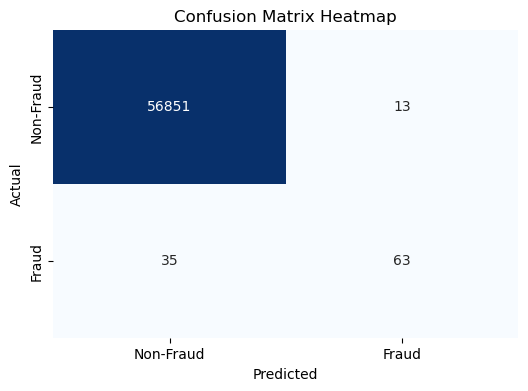

In [18]:
# Confusion Matrix Heatmap

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


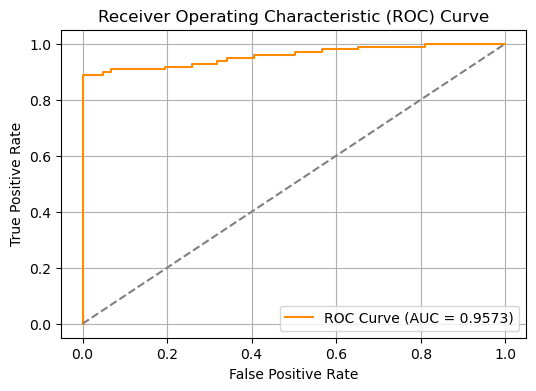

In [20]:
# ROC-AUC Curve Plot (ROC-AUC Curve evaluates classifier performance across all classification thresholds)

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (fraud)
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Training the Model uisng Decision Tree Classifier:

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree with class_weight to handle imbalance
dt_model = DecisionTreeClassifier(
    criterion='gini',          # or 'entropy'
    max_depth=None,            # Let it grow fully (can tune this later)
    class_weight='balanced',   # Handle imbalance
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Make Predictions using Decision Tree

In [25]:
# Predict class labels
y_pred_dt = dt_model.predict(X_test)

# Predict probabilities for ROC curve
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the Model using Decision Tree

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Confusion Matrix
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

# Classification Report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")

# ROC-AUC Score
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
print(f"ROC-AUC (Decision Tree): {auc_dt:.4f}")

Confusion Matrix (Decision Tree):
[[56833    31]
 [   29    69]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.70      0.70        98

    accuracy                           1.00     56962
   macro avg       0.84      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy (Decision Tree): 0.9989
ROC-AUC (Decision Tree): 0.8518


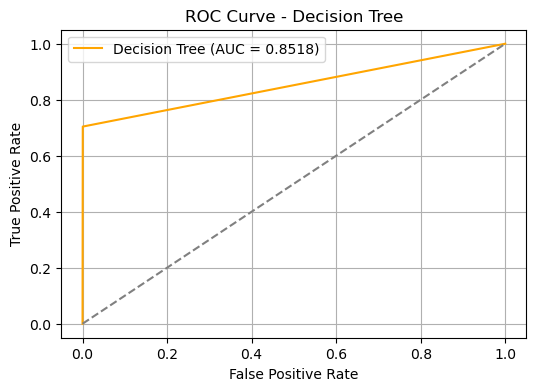

In [29]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get ROC curve values
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.4f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion
- Used logistic regression for binary classification.
- Addressed feature scaling and class imbalance.
- Future work: try ensemble methods (e.g. Random Forest, XGBoost) or SMOTE for better fraud detection.